In [ ]:
!pip install requests beautifulsoup4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
from bs4 import BeautifulSoup
import os

### Mount Google Drive

In [ ]:
import os
drive_path = "/content/drive/MyDrive/Colab Notebooks/UWE Data"

### Define Target Pages

In [ ]:
pages = {
    "Undergraduate_study": "https://www.uwe.ac.uk/courses/undergraduate-study",
    "Postgraduate_study": "https://www.uwe.ac.uk/courses/postgraduate-study",
    "Internship_study": "https://www.uwe.ac.uk/courses/internship-study",
    "Funding_scholarship": "https://www.uwe.ac.uk/courses/funding",
    "Life": "https://www.uwe.ac.uk/life",
    "Careers": "https://www.uwe.ac.uk/careers",
    "Alumni": "https://www.uwe.ac.uk/alumni",
    "About_us": "https://www.uwe.ac.uk/about",
    "Events": "https://www.uwe.ac.uk/events",
    "Contact_us": "https://www.uwe.ac.uk/contact"
}

### Webscraping

In [ ]:
def scrape_page(url):
    try:
        response = requests.get(url, timeout = 10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        title = soup.title.text.strip() if soup.title else "No Title"
        paragraphs = [p.text.strip() for p in soup.find_all('p') if p.text.strip()]
        return title, paragraphs
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return "Error", []


### Save Data as Markdown file

In [ ]:
def save_as_markdown(title, paragraphs, file_path):
    filepath = os.path.join(drive_path, f"{filename}.md")
    with open(filepath, "w", encoding = "utf-8") as file:
        file.write(f"# {title}\n\n")
        for paragraph in paragraphs:
            file.write(f"{paragraph}\n\n")
    print(f"Data saved to {filepath}")

### Loop through Pages and save results

In [ ]:
for filename, url in pages.items():
  print(f"Scaping: {url}")
  title, content = scrape_page(url)
  save_as_markdown(title, content, filename)

Scaping: https://www.uwe.ac.uk/courses/undergraduate-study
Data saved to /content/drive/MyDrive/Colab Notebooks/UWE Data/Undergraduate_study.md
Scaping: https://www.uwe.ac.uk/courses/postgraduate-study
Data saved to /content/drive/MyDrive/Colab Notebooks/UWE Data/Postgraduate_study.md
Scaping: https://www.uwe.ac.uk/courses/internship-study
Error scraping https://www.uwe.ac.uk/courses/internship-study: 404 Client Error: Page not found for url: https://www.uwe.ac.uk/courses/internship-study
Data saved to /content/drive/MyDrive/Colab Notebooks/UWE Data/Internship_study.md
Scaping: https://www.uwe.ac.uk/courses/funding
Data saved to /content/drive/MyDrive/Colab Notebooks/UWE Data/Funding_scholarship.md
Scaping: https://www.uwe.ac.uk/life
Data saved to /content/drive/MyDrive/Colab Notebooks/UWE Data/Life.md
Scaping: https://www.uwe.ac.uk/careers
Data saved to /content/drive/MyDrive/Colab Notebooks/UWE Data/Careers.md
Scaping: https://www.uwe.ac.uk/alumni
Data saved to /content/drive/MyDrive

### Vector Data Base and Embedding

In [ ]:
!pip install -q transformers sentence-transformers faiss-cpu langchain gradio chromadb qdrant-client


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.4 MB/s eta 0:0

In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

KB_PATH = "/content/drive/MyDrive/Colab Notebooks/UWE Data"

files = [os.path.join(dp, f) for dp, _, fn in os.walk(KB_PATH) for f in fn if f.endswith(".md")]
docs = [doc for f in files for doc in TextLoader(f, encoding = "utf-8").load()]

splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 50)
chunks = splitter.split_documents(docs)
texts = [chunk.page_content for chunk in chunks]
print(f"{len(chunks)} chunks generated.")


52 chunks generated.


### Convert to embedding ( zeros and ones)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

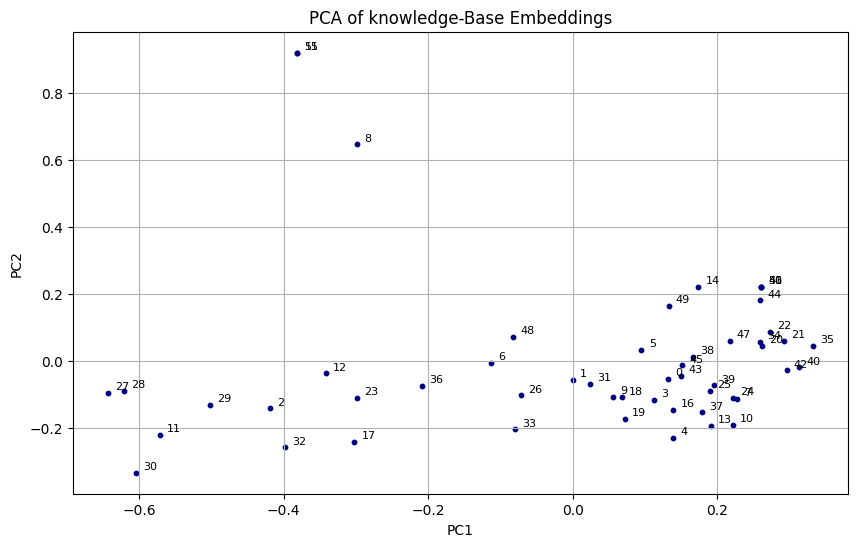

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Embed all chunks
embed_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
texts = [chunk.page_content for chunk in chunks]
embeddings = embed_model.encode(texts, show_progress_bar = True)

# PCA to 2 dimensions
pca = PCA(n_components = 2)
reduced = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize = (10, 6))
for i, (x, y) in enumerate(reduced):
  plt.scatter(x, y, s = 10, c = "navy")
  plt.text(x + 0.01, y + 0.01, str(i), fontsize = 8)
plt.title("PCA of knowledge-Base Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

### Build an in Memory FAISS Vector Store

In [ ]:
import faiss
from langchain.vectorstores import FAISS as LangChainFAISS
from langchain.docstore import InMemoryDocstore
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

# Raw FAISS index
dim = embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(dim)
faiss_index.add(np.array(embeddings, dtype = "float32"))

# Prepare LangChain wrapper
docs = [Document(page_content = t) for t in texts]
docstore = InMemoryDocstore({str(i): docs[i] for i in range(len(docs))})
id_map = {i: str(i) for i in range(len(docs))}
embed_fn = HuggingFaceEmbeddings(model_name = "sentence-transformers/all-MiniLM-L6-v2")

vectorstore_faiss = LangChainFAISS(
    index = faiss_index,
    docstore = docstore,
    index_to_docstore_id=id_map,
    embedding_function = embed_fn
)

print("FAISS vectorestore ready")

<ipython-input-18-2876831188>:16: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_fn = HuggingFaceEmbeddings(model_name = "sentence-transformers/all-MiniLM-L6-v2")


FAISS vectorestore ready


In [ ]:
query = "What is UWE about?"
results = vectorstore_faiss.similarity_search(query, k = 3)

print("Top 3 FAISS Results:")
for i, doc in enumerate(results):
  print(f"\n- Passage {i + 1}:\n{doc.page_content[:300]}_")

Top 3 FAISS Results:

- Passage 1:
# About us | UWE Bristol

At UWE Bristol, we're focused on solving future global challenges through outstanding learning, world-leading research and a culture of enterprise.

Employability figures, league table positions and other important University metrics.

Our current vacancies and all the bene_

- Passage 2:
# Life | UWE Bristol

Find out about our city, accommodation, campus and facilities, sports, activities and societies, and ways to get involved in volunteering, music or other things that matter to you.

We also have a Student Life Team and a range of support services to take care of your health and_

- Passage 3:
Discover our staff, including contact details.

The UWE Bristol story dating back to our beginnings in 1595.

Facts and figures about our student and staff populations.

View our terms and conditions, accessibility guidance, privacy policy, cookie policy and many other options.

General enquiries an_


### Try ChromaDB to see if it is faster

In [ ]:
import chromadb
from chromadb.config import Settings
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

# Initialize persistent client (will creat 'chroma_data/' locally)
client = chromadb.PersistentClient(
    path = "chroma_data",
    settings=Settings()
)

# Create or land a clollection named "School_demo"
collection = client.get_or_create_collection(
    name = "UWE",
    embedding_function = SentenceTransformerEmbeddingFunction(
        model_name = "sentence-transformers/all-MiniLM-L6-v2"
    )
)

# Upset your chunks (ids + documents)
ids = [str(i) for i in range(len(texts))]
collection.upsert(
    ids = ids,
    documents = texts
)

# Query for top 3 similar passages
query = "What is UWE about"
resp = collection.query(
    query_texts = [query],
    n_results = 3
)
print("Top 3 ChromaDB Results:")
for doc in resp["documents"][0]:
  print(f"_", doc[:200].replace("\n", " "), "_")

Top 3 ChromaDB Results:
_ # About us | UWE Bristol  At UWE Bristol, we're focused on solving future global challenges through outstanding learning, world-leading research and a culture of enterprise.  Employability figures, le _
_ # Events | UWE Bristol  We can't wait to meet you! We have lots of welcome events and activities planned to help you settle in to UWE Bristol.  To help you get settled into university-level education, _
_ Discover our staff, including contact details.  The UWE Bristol story dating back to our beginnings in 1595.  Facts and figures about our student and staff populations.  View our terms and conditions, _


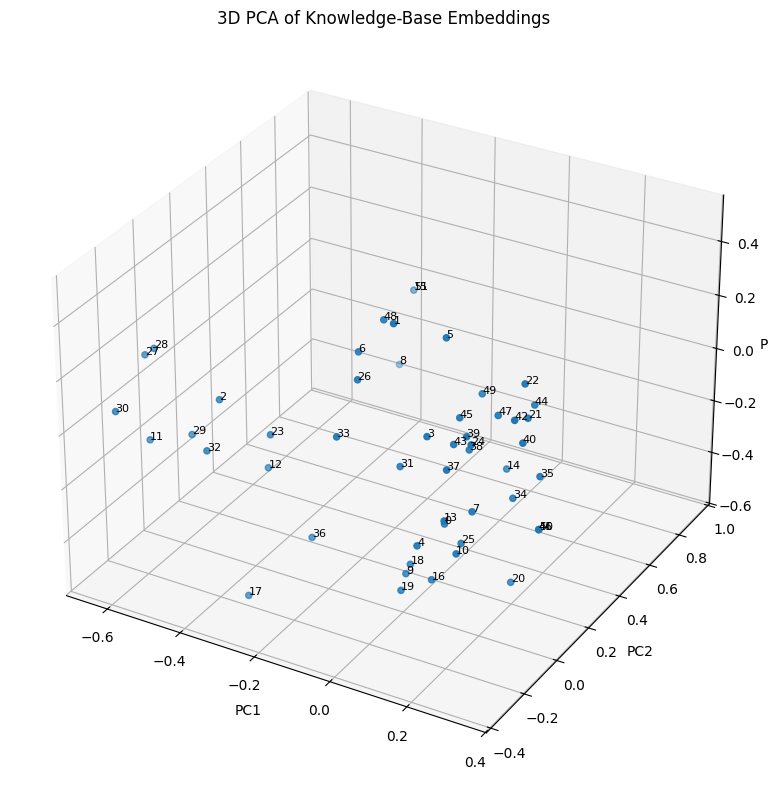

In [ ]:
# 3D PCA Visualisation of the vector Store Embedding

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract FAISS index
faiss_idx = vectorstore_faiss.index
n = faiss_idx.ntotal

# Reconstruct all vectors
emb_arr = np.vstack([faiss_idx.reconstruct(i) for i in range(n)])

# Reduce to 3D
pca3 = PCA(n_components= 3)
embeddings_3d = pca3.fit_transform(emb_arr)

# Plot in 3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
xs, ys, zs = embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2]
ax.scatter(xs, ys, zs)

# Annotate each point with its index
for i in range(n):
  ax.text(xs[i], ys[i], zs[i], str(i), fontsize = 8)

ax.set_title("3D PCA of Knowledge-Base Embeddings")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()

